In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import math
import random
%matplotlib inline

In [4]:
notDecimal = []
def readGood(name):
    i = 0
    with open(name, "r") as file:
        lines = file.readlines()
        for l in lines:
            i = i + 1
            s = l.strip()
            if s.isdecimal():
                yield i, float(s)
            else:
                notDecimal.append((i,s))
                

In [5]:
goods = readGood("output.txt")

In [6]:
df = pd.DataFrame(goods, columns=["frame", "speed"])

In [7]:
notDecimal

[(1, 'UUUUO'),
 (2, ''),
 (4, ''),
 (6, ''),
 (8, ''),
 (10, ''),
 (12, ''),
 (14, ''),
 (16, ''),
 (18, ''),
 (20, ''),
 (22, ''),
 (24, ''),
 (26, ''),
 (28, ''),
 (30, ''),
 (32, ''),
 (34, ''),
 (36, ''),
 (38, ''),
 (40, ''),
 (42, ''),
 (44, ''),
 (46, ''),
 (48, ''),
 (50, ''),
 (52, ''),
 (54, ''),
 (56, ''),
 (58, ''),
 (60, ''),
 (62, ''),
 (64, ''),
 (66, ''),
 (68, ''),
 (70, ''),
 (72, ''),
 (74, ''),
 (76, ''),
 (78, ''),
 (80, ''),
 (82, ''),
 (84, ''),
 (86, ''),
 (88, ''),
 (90, ''),
 (92, ''),
 (94, ''),
 (96, ''),
 (98, ''),
 (100, ''),
 (102, ''),
 (104, ''),
 (106, ''),
 (108, ''),
 (110, ''),
 (112, ''),
 (114, ''),
 (116, ''),
 (118, ''),
 (120, ''),
 (122, ''),
 (124, ''),
 (126, ''),
 (128, ''),
 (130, ''),
 (132, ''),
 (134, ''),
 (136, ''),
 (138, ''),
 (140, ''),
 (142, ''),
 (144, ''),
 (146, ''),
 (148, ''),
 (150, ''),
 (152, ''),
 (154, ''),
 (156, ''),
 (158, ''),
 (160, ''),
 (162, ''),
 (164, ''),
 (166, ''),
 (168, ''),
 (170, ''),
 (172, ''),
 (174,

In [8]:
df

,frame,speed
0,3,0.0
1,5,0.0
2,7,0.0
3,9,0.0
4,11,0.0
5,13,0.0
6,15,0.0
7,17,0.0
8,19,0.0
9,21,0.0


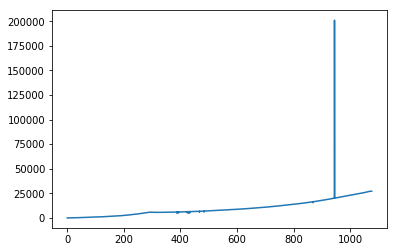

In [9]:
plt.plot(df.frame/30, df.speed)

In [11]:
ss = np.array(df.speed)

In [12]:
ds = np.abs(ss[0:-1] - ss[1:])

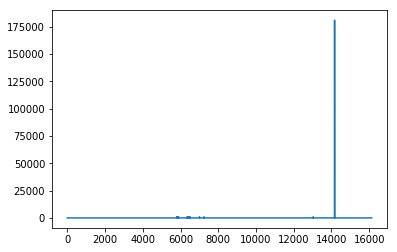

In [13]:
plt.plot(ds)

In [14]:
def dropOutliers(df, threshold):
    bad = []
    i = 0
    while i < 3:
        print("X")
        i += 1
        ss = np.array(df.speed)
        ds = np.abs(ss[0:-1] - ss[1:])
        outliers = np.where(ds > threshold)[0] + 1
        if len(outliers) == 0 or len(df) <= 2:
            return bad,df
        bad.extend(zip(list(df.frame[outliers]), list(ds[ds > threshold])))
        df = df.drop(outliers)
        df.index = range(len(df.index))
    return bad,df

In [15]:
bad,clean = dropOutliers(df, 4)

X
X
X


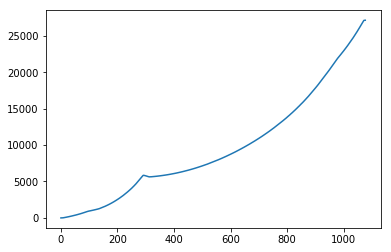

In [16]:
plt.plot(clean.frame/30, clean.speed)

In [24]:
im = cv2.imread("frames/crop00167.jpg")

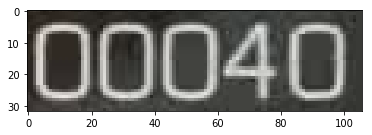

In [25]:
plt.imshow(im)

In [26]:
im.shape[1] / 5

21.2

In [27]:
def splitImage(im):
    ims = []
    w = int(im.shape[1] / 5) - 1
    xs = [i*w + 3 for i in range(6)]
    for i in range(5):
        ims.append(im[:,xs[i]:xs[i+1],:])
    return ims

In [28]:
def extractValues(df, i):
    frame = df.frame[i]
    speed = df.speed[i]
    s = "{:05}".format(frame)
    ds = "{:05}".format(int(speed))
    im = cv2.imread("frames/crop" + s + ".jpg")
    
    return list(zip(ds, splitImage(im)))

In [29]:
vs = extractValues(clean, 2000)

0


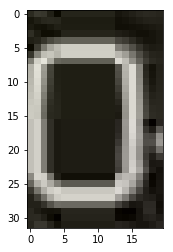

1


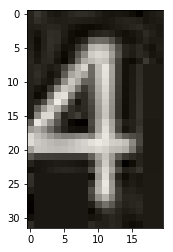

2


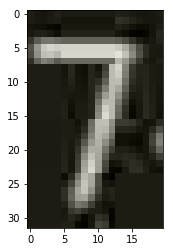

4


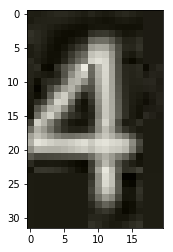

8


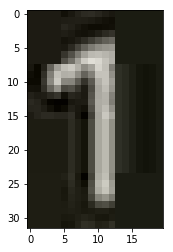

In [30]:
for i,im in vs:
    print(i)
    plt.imshow(im)
    plt.show()

In [88]:
dim = {str(d):[] for d in range(10)}
n = 0
each_count = 100
while n < 10*each_count:
    i = random.randint(0,clean.shape[0]-1)
    vs = extractValues(clean, i)
    for d,im in vs:
        if len(dim[d]) < each_count:
            dim[d].append(im)
            n += 1
        

In [92]:
for k,v in dim.items():
    print(k, len(v))

0 100
1 100
2 100
3 100
4 100
5 100
6 100
7 100
8 100
9 100


In [138]:
imshape = dim["5"][67].shape

In [102]:
imall = np.array([im.flatten() for _,v in dim.items() for im in v])

In [103]:
imall.shape

(1000, 2040)

In [143]:
labels = np.array([int(c) for l,v in dim.items() for c in l*len(v)])
label_names = [str(d) for d in range(10)]

In [124]:
len(labels)

1000

1


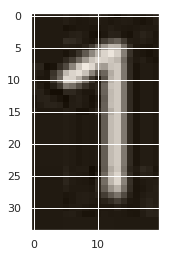

In [345]:
i = random.randint(0,1000-1)
#i = 723
print(labels[i])
im = np.reshape(imall[i,:], dim["5"][67].shape)
plt.imshow(im)

In [346]:
from sklearn.decomposition import PCA


In [424]:
pca = PCA(5)  # project from n to 2 dimensions
projected = pca.fit_transform(imall)
print(imall.shape)
print(projected.shape)

(1000, 2040)
(1000, 5)


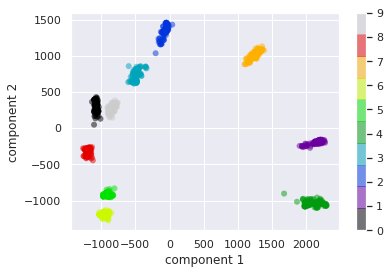

In [348]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
#centroids = model.steps[1][1].cluster_centers_
plt.colorbar();
#plt.scatter(centroids[:, 0], centroids[:, 1],
#            marker='x', s=169, linewidths=3,
#            color='w', zorder=10)

In [425]:
from sklearn.svm import SVC
#from sklearn.pipeline import make_pipeline
#svc = SVC(kernel='rbf', class_weight='balanced')
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
#gmm = GaussianMixture(n_components=10, max_iter=10000)
#km = KMeans(n_clusters=10, max_iter=10000)
knn = KNeighborsClassifier(50)
model = make_pipeline(pca, knn)

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(imall, labels, random_state=42)

In [426]:
from sklearn.model_selection import GridSearchCV
#param_grid = {'svc__C': [1, 5, 10, 50],
#              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
#grid = GridSearchCV(model, param_grid, cv=5)

#%time grid.fit(Xtrain, ytrain)
#print(grid.best_params_)
model.fit(Xtrain, ytrain)

Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('kneighborsclassifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform'))])

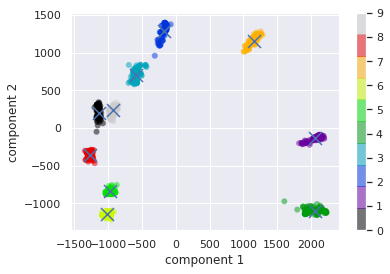

In [326]:
projected = model.steps[0][1].transform(imall)
plt.scatter(projected[:, 0], projected[:, 1],
            c=labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
centroids = model.steps[1][1].cluster_centers_
plt.colorbar();
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            cmap=plt.cm.get_cmap('nipy_spectral', 10), zorder=10)

In [333]:
model.steps[1][1].predict([[1500,1500]])
model.steps[1][1].cluster_centers_

array([[-1139.38081111,   199.32780588],
       [ 2061.823652  ,  -137.96024866],
       [ -176.99258898,  1292.82990815],
       [ 1153.04775117,  1158.41451501],
       [-1012.67309681, -1142.4124973 ],
       [ 2052.57786744, -1102.89360697],
       [ -580.01030712,   710.55713484],
       [-1273.37199537,  -352.74329091],
       [ -920.69952515,   236.06754093],
       [ -967.47177822,  -839.99935886]])

In [334]:
projected = model.steps[0][1].transform(Xtest)
yfit = model.steps[1][1].predict(projected)

In [337]:
yall = model.predict(imall)
mapping = {p:l for p,l in zip(yall,labels)}

In [356]:
#model = grid.best_estimator_
#yfit = np.array([mapping[y] for y in model.predict(Xtest)])
yfit = model.predict(Xtest)

In [357]:
yfit

array([5, 7, 7, 6, 4, 6, 6, 5, 8, 1, 8, 0, 6, 9, 9, 8, 2, 8, 7, 3, 5, 1,
       3, 5, 2, 2, 1, 9, 9, 9, 3, 1, 6, 4, 3, 1, 6, 5, 9, 0, 3, 0, 3, 9,
       2, 2, 9, 6, 4, 8, 5, 8, 2, 5, 0, 0, 6, 0, 2, 8, 2, 0, 5, 2, 6, 6,
       6, 8, 0, 5, 1, 4, 5, 7, 2, 2, 6, 0, 5, 3, 6, 0, 2, 0, 3, 5, 9, 7,
       7, 3, 3, 4, 5, 2, 7, 4, 7, 0, 0, 8, 7, 3, 9, 2, 6, 6, 5, 9, 1, 9,
       5, 8, 9, 8, 0, 4, 1, 9, 5, 2, 8, 4, 7, 2, 2, 5, 5, 4, 8, 8, 5, 8,
       2, 9, 5, 0, 1, 2, 0, 0, 0, 2, 7, 2, 8, 9, 8, 2, 8, 3, 6, 1, 9, 4,
       9, 4, 3, 6, 0, 8, 5, 7, 6, 6, 8, 6, 2, 6, 3, 3, 3, 4, 1, 9, 4, 3,
       2, 2, 8, 6, 4, 6, 3, 5, 8, 1, 3, 3, 9, 7, 9, 8, 6, 1, 2, 4, 3, 2,
       6, 0, 0, 5, 6, 5, 8, 5, 1, 9, 4, 8, 0, 1, 9, 8, 6, 3, 6, 2, 9, 7,
       3, 7, 9, 0, 8, 0, 5, 3, 9, 5, 3, 9, 4, 5, 0, 0, 2, 9, 1, 3, 0, 2,
       5, 7, 3, 1, 4, 0, 0, 2])

In [358]:
model.steps[0][1]

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

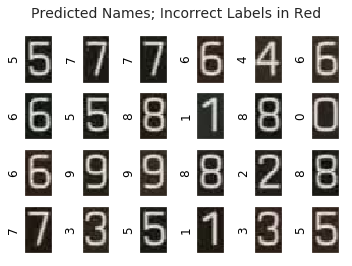

In [359]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(imshape), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(label_names[yfit[i]],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [360]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=label_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        27
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        29
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00        28

   micro avg       1.00      1.00      1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



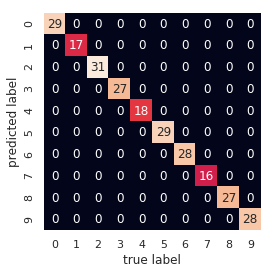

In [361]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=label_names,
            yticklabels=label_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [427]:
def readSpeed(file):
    imAll = cv2.imread(file)
    ims = splitImage(imAll)
    X = np.reshape(ims, (5,2040))
    y = model.predict(X)
    p = 0
    for v in y:
        p = p*10 + v
    return p

In [428]:
import glob
speeds = []
for file in sorted(glob.glob("frames/crop*.jpg")):
    speeds.append(readSpeed(file))

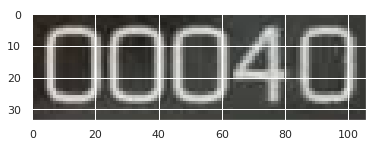

In [366]:
plt.imshow(imAll)


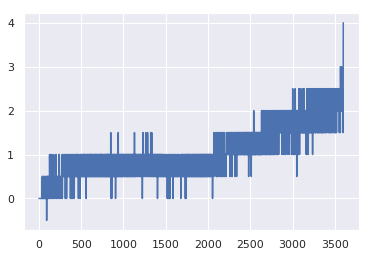

In [433]:
#plt.plot(speeds)
plt.plot(np.gradient(speeds))

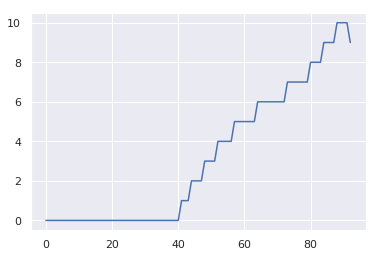

In [384]:
plt.plot(speeds[0:93])

In [385]:
readSpeed("frames/crop00093.jpg")

9

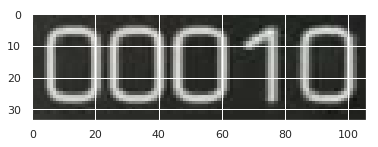

In [394]:
im = cv2.imread("frames/crop00097.jpg")
plt.imshow(im)

In [429]:
accel = np.gradient(speeds)

In [430]:
np.where(accel < 0)

(array([91, 92]),)

10


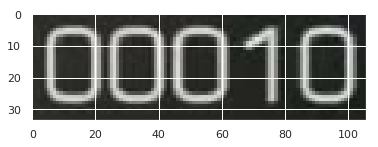

10


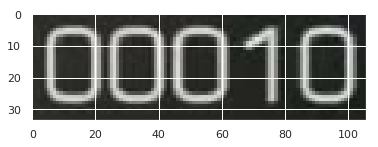

In [431]:
def check(file):
    im = cv2.imread(file)
    print(readSpeed(file))
    plt.imshow(im)
    plt.show()

for i in np.where(accel < 0)[0]:
    check("frames/crop{:05d}.jpg".format(i))